In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
nb_classes = 12
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [4]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) 
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [6]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 33s 544us/step - loss: 0.2499 - val_loss: 0.1076
Epoch 2/4
60000/60000 [==============================] - 35s 587us/step - loss: 0.1022 - val_loss: 0.0791
Epoch 3/4
60000/60000 [==============================] - 32s 541us/step - loss: 0.0704 - val_loss: 0.0725
Epoch 4/4
60000/60000 [==============================] - 32s 531us/step - loss: 0.0576 - val_loss: 0.0639


In [7]:
#切图片

import cv2
import numpy as np

img = cv2.imread("./handnumbers2.jpg")
x1 = 300
x2 = 1000
y1 = 200
y2 = 700
for i in range(4):
    for j in range(2):
        img_crop = img[x1+1000*j:x2+1000*j,y1+800*i:y2+800*i]
        filename = str(i)+str(j)+".jpg"
        cv2.imwrite(filename,img_crop)
        cv2.imshow("ing",img_crop)
        cv2.waitKey(0)

cv2.destroyAllWindows()

In [8]:
import cv2
for i in range(4):
    for j in range(2):
        filename = str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        ret,thresh1=cv2.threshold(GrayImage,120,255,cv2.THRESH_BINARY)
        resized_image = cv2.resize(thresh1, (28, 28)) 
        invimg = ~resized_image
        outputfile="hn28inv"+str(i)+str(j)+".jpg"
        print(outputfile)
        cv2.imwrite(outputfile,invimg)

hn28inv00.jpg
hn28inv01.jpg
hn28inv10.jpg
hn28inv11.jpg
hn28inv20.jpg
hn28inv21.jpg
hn28inv30.jpg
hn28inv31.jpg


In [18]:
import cv2
import numpy

X_pred = numpy.zeros(shape=(8,28,28))
index=0

for i in range(4):
    for j in range(2):
        filename="hn28inv"+str(i)+str(j)+".jpg"
        print(filename)
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        X_pred[index]=cv2.resize(GrayImage, (28, 28))
        index+=1
print(X_pred.shape)

hn28inv00.jpg
hn28inv01.jpg
hn28inv10.jpg
hn28inv11.jpg
hn28inv20.jpg
hn28inv21.jpg
hn28inv30.jpg
hn28inv31.jpg
(8, 28, 28)


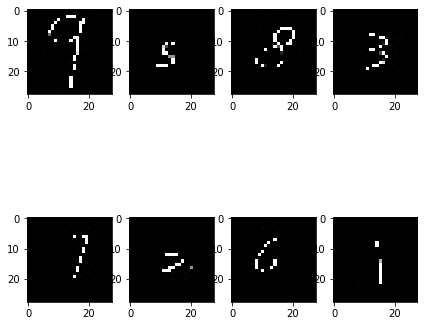

In [19]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_pred[i], cmap='gray', interpolation='none')

In [20]:
Y_pred = [9,5,8,3,7,2,6,1]
X_pred = X_pred.reshape(8, 784)
X_pred = X_pred.astype('float32')
X_pred /= 255
print("Testing matrix shape", X_pred.shape)
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes==Y_pred)

Testing matrix shape (8, 784)
[1 5 9 7 7 4 4 1]
